In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import resample as rp
import intervals as ci
import observe as obs
from multiprocessing import Pool, cpu_count

In [2]:
# simulation of the entire demographic history
pop_ts = obs.sim_one_population(
    diploid_size=200,
    seq_len=1e9,
    rec_rate=1e-8,
    mut_rate=1e-8
)

obs_ts = obs.observe(ts=pop_ts, num_inds=50, max_sites=5000)

In [3]:
pop_ts_diversity = pop_ts.diversity(span_normalise = False, windows = 'sites').mean()

obs_ts_diversity = obs_ts.diversity(span_normalise = False, windows = 'sites').mean()

print('Site diversity for the simulated population is: ', pop_ts_diversity)
print('Site diversity for the observed population is: ', obs_ts_diversity)

Site diversity for the simulated population is:  0.1481381204110903
Site diversity for the observed population is:  0.15101046464646464


In [4]:
# site diversity for the observed population
diversity = rp.site_diversity(obs_ts)
diversity

array([0.0959596 , 0.48484848, 0.11393939, ..., 0.31090909, 0.03959596,
       0.16545455])

In [5]:
bt = rp.bt_resample_sites(diversity, n_boot=500)
jk_d, jk_vals = rp.jk_delete_one(diversity, obs_ts_diversity)
jk_m_d, jk_m_vals = rp.jk_delete_m(diversity, obs_ts_diversity, n_fold=int(np.sqrt(obs_ts.num_sites)))
jk_mj_d, jk_mj_vals, sizes = rp.jk_delete_mj(diversity, obs_ts_diversity, n_fold=int(np.sqrt(obs_ts.num_sites)))

In [6]:
sizes

array([77, 78, 74, 75, 73, 73, 75, 56, 67, 60, 78, 69, 65, 80, 96, 71, 64,
       75, 66, 65, 74, 88, 76, 85, 73, 75, 68, 74, 65, 65, 70, 59, 80, 93,
       57, 72, 73, 70, 66, 64, 64, 77, 79, 84, 70, 78, 70, 55, 70, 79, 67,
       69, 71, 65, 78, 68, 74, 71, 63, 59, 70, 72, 76, 71, 60, 79, 65, 66,
       66, 80])

<AxesSubplot:ylabel='Count'>

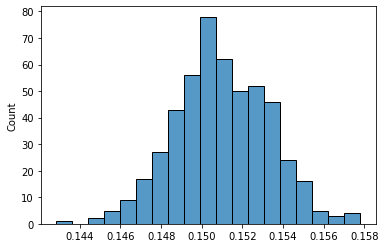

In [7]:
sns.histplot(bt)

<AxesSubplot:ylabel='Count'>

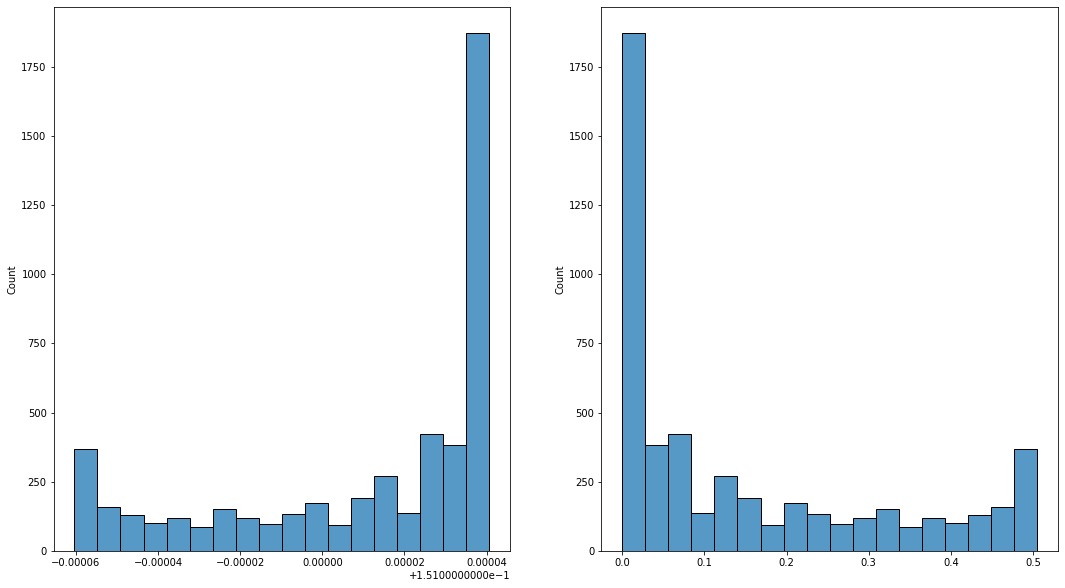

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.histplot(ax=axes[0], data=jk_d)
sns.histplot(ax=axes[1], data=jk_vals)

<AxesSubplot:ylabel='Count'>

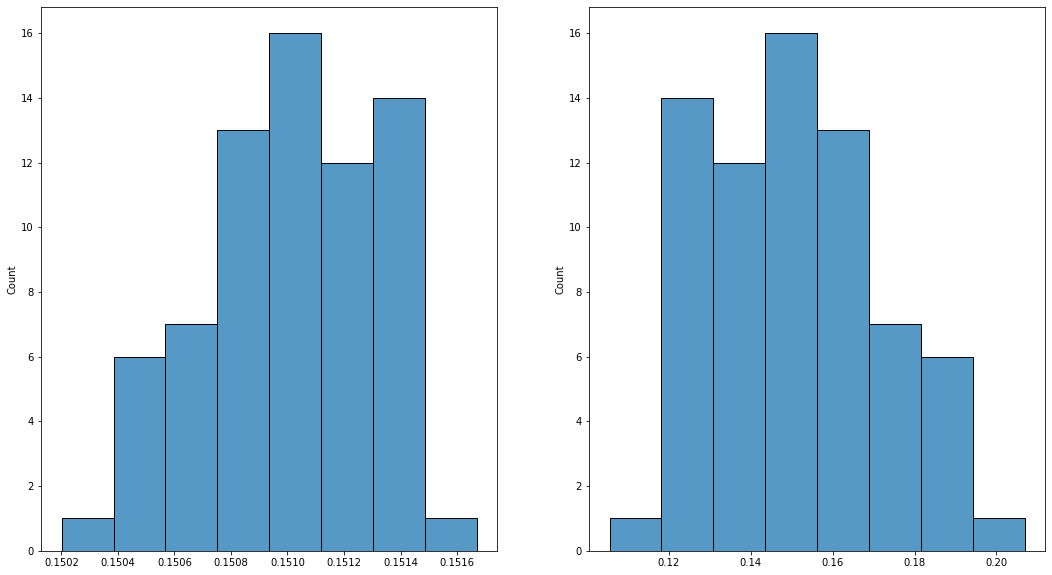

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.histplot(ax=axes[0], data=jk_m_d)
sns.histplot(ax=axes[1], data=jk_m_vals)

<AxesSubplot:ylabel='Count'>

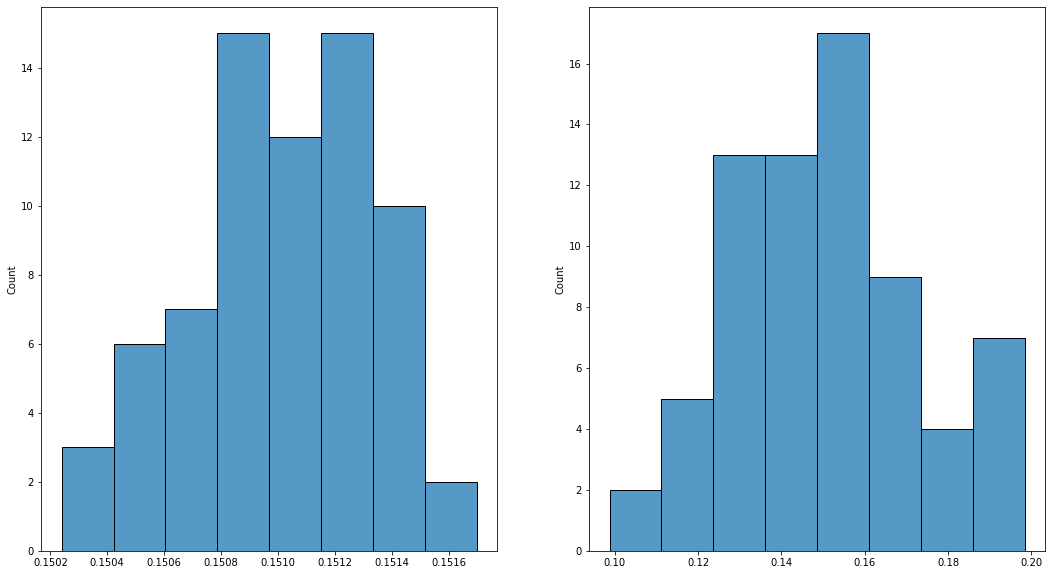

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.histplot(ax=axes[0], data=jk_mj_d)
sns.histplot(ax=axes[1], data=jk_mj_vals)

In [11]:
bt_normal = ci.normal(bt, 0.95, obs_value=obs_ts_diversity)
bt_quantile = ci.quantile(bt, 0.95)
bt_bias_corrected = ci.bias_corrected_normal(bt, 0.95, obs_ts_diversity)

jk_vals_ci = ci.jk_ps(jk_vals, 0.95)
jk_d_ci = ci.jk_m(jk_d, 0.95, obs_ts_diversity)

jk_m_vals_ci = ci.jk_ps(jk_m_vals, 0.95)
jk_m_d_ci = ci.jk_m(jk_m_d, 0.95, obs_ts_diversity)

jk_mj_vals_ci = ci.jk_ps(jk_mj_vals, 0.95)
jk_mj_d_ci = ci.jk_mj(jk_mj_d, 0.95, obs_ts_diversity, sizes)

In [42]:
bt_df = pd.DataFrame({'lower': [bt_normal[0], bt_quantile[0], bt_bias_corrected[0]],
                     'upper': [bt_normal[1], bt_quantile[1], bt_bias_corrected[1]]})
bt_df.index = ['bt_normal', 'bt_quantile', 'bt_bias_corrected']
bt_df

,lower,upper
bt_normal,0.146454,0.155567
bt_quantile,0.146643,0.155231
bt_bias_corrected,0.146472,0.155586


In [44]:
jk_df = pd.DataFrame({'lower': [jk_vals_ci[0], jk_d_ci[0], jk_m_vals_ci[0], 
                                jk_m_d_ci[0], jk_mj_vals_ci[0], jk_vals_ci[0]],
                      'upper': [jk_vals_ci[1], jk_d_ci[1], jk_m_vals_ci[1], 
                                jk_m_d_ci[1], jk_mj_vals_ci[1], jk_vals_ci[1]]})
jk_df

,lower,upper
0,0.146334,0.155687
1,0.146334,0.155687
2,0.146012,0.156009
3,0.146012,0.156009
4,0.145564,0.155958
5,0.146334,0.155687


In [12]:
bt_normal

(0.14645355294577353, 0.15556737634715576)

In [13]:
bt_quantile

(0.14664323535353535, 0.15523075757575758)

In [14]:
bt_bias_corrected

(0.1464717105215311, 0.15558553392291333)

In [15]:
jk_vals_ci # pseudo ones 

(0.1463344158979711, 0.15568651339491232)

In [16]:
jk_d_ci  # without pseudo 

(0.1463344158979944, 0.1556865133949349)

In [17]:
jk_m_vals_ci # pseudo ones block equal size

(0.14601233149604823, 0.15600904438522675)

In [18]:
jk_m_d_ci # without pseudo 

(0.1460121082018754, 0.15600882109105388)

In [19]:
jk_mj_vals_ci # pseudo ones block unequal size 

(0.14556422634019395, 0.1559578595951165)

In [20]:
jk_mj_d_ci # without pseudo 

(0.14584382518708283, 0.15617710410584645)

In [21]:
obs_ts_diversity

0.15101046464646464

In [22]:
jk_mj_vals

array([0.13488915, 0.1865035 , 0.17006552, 0.14684714, 0.16136986,
       0.1335907 , 0.12603906, 0.12151154, 0.14937736, 0.13565657,
       0.16080031, 0.15399795, 0.14615385, 0.19839646, 0.15503577,
       0.13738227, 0.11658775, 0.18877845, 0.15808387, 0.14981818,
       0.18263991, 0.13618687, 0.17075758, 0.16518835, 0.19719109,
       0.15873939, 0.11938503, 0.16912913, 0.09876923, 0.17171717,
       0.13718615, 0.15682246, 0.12652273, 0.13236451, 0.15424065,
       0.15340629, 0.14853466, 0.19524387, 0.18729109, 0.16061553,
       0.12904672, 0.1473698 , 0.17512339, 0.14029582, 0.13406349,
       0.15440559, 0.16227417, 0.1468944 , 0.12178644, 0.12639304,
       0.17716569, 0.15856536, 0.14019633, 0.1275338 , 0.144144  ,
       0.15177956, 0.13943216, 0.137792  , 0.1514446 , 0.18848142,
       0.13202597, 0.15659933, 0.15725678, 0.18369612, 0.16223569,
       0.12950518, 0.10851593, 0.1228038 , 0.12890725, 0.16472222])

In [23]:
jk_mj_d

array([0.15126262, 0.150448  , 0.15072421, 0.15107387, 0.15085698,
       0.15126856, 0.15139074, 0.15134459, 0.15103265, 0.15119695,
       0.15085532, 0.15096866, 0.15107443, 0.15023996, 0.15093167,
       0.15120677, 0.15145679, 0.15043532, 0.15091585, 0.15102617,
       0.15053532, 0.15127603, 0.15070568, 0.15076527, 0.15032624,
       0.15089277, 0.1514465 , 0.15073828, 0.15169855, 0.15073773,
       0.15120675, 0.15094106, 0.15140864, 0.15136385, 0.15097322,
       0.15097546, 0.15104715, 0.1503824 , 0.15052515, 0.15088593,
       0.15129525, 0.15106741, 0.15062336, 0.15119355, 0.15125109,
       0.15095666, 0.15085053, 0.15105624, 0.15142541, 0.15140566,
       0.15065522, 0.15090475, 0.15116624, 0.15131968, 0.15111928,
       0.15099986, 0.1511844 , 0.15120087, 0.15100492, 0.15056303,
       0.15128002, 0.15092881, 0.15091406, 0.15053964, 0.15087413,
       0.1513557 , 0.15157017, 0.15138777, 0.15130613, 0.15078751])

In [24]:
np.mean(jk_mj_vals)

0.15076104296765522

In [25]:
mean = 70 * obs_ts_diversity - np.sum((1 - sizes / 5000) * jk_mj_d)
mean

0.15101046464646473

In [26]:
h = 5000 / sizes
h

array([64.93506494, 64.1025641 , 67.56756757, 66.66666667, 68.49315068,
       68.49315068, 66.66666667, 89.28571429, 74.62686567, 83.33333333,
       64.1025641 , 72.46376812, 76.92307692, 62.5       , 52.08333333,
       70.42253521, 78.125     , 66.66666667, 75.75757576, 76.92307692,
       67.56756757, 56.81818182, 65.78947368, 58.82352941, 68.49315068,
       66.66666667, 73.52941176, 67.56756757, 76.92307692, 76.92307692,
       71.42857143, 84.74576271, 62.5       , 53.76344086, 87.71929825,
       69.44444444, 68.49315068, 71.42857143, 75.75757576, 78.125     ,
       78.125     , 64.93506494, 63.29113924, 59.52380952, 71.42857143,
       64.1025641 , 71.42857143, 90.90909091, 71.42857143, 63.29113924,
       74.62686567, 72.46376812, 70.42253521, 76.92307692, 64.1025641 ,
       73.52941176, 67.56756757, 70.42253521, 79.36507937, 84.74576271,
       71.42857143, 69.44444444, 65.78947368, 70.42253521, 83.33333333,
       63.29113924, 76.92307692, 75.75757576, 75.75757576, 62.5 

In [27]:
var_ps = np.sum(np.square(jk_mj_vals - mean) / (h - 1)) / 70
var_ps

6.948965106547155e-06

In [28]:
np.sqrt(var_ps)

0.0026360889792545234

In [29]:
var = np.sum(np.square(h * obs_ts_diversity - (h - 1) * jk_mj_d - mean) / (h - 1)) / 70

In [30]:
var

6.948965106547155e-06

In [31]:
t = np.square(h * obs_ts_diversity - (h - 1) * jk_mj_d - mean) / (h - 1)

In [32]:
sum(t) / 70

6.94896510654715e-06

In [33]:
obs_ts_diversity - 1.96 * np.sqrt(var), obs_ts_diversity + 1.96 * np.sqrt(var)

(0.14584373024712577, 0.15617719904580352)

In [34]:
obs_ts_diversity

0.15101046464646464

In [35]:
np.mean(jk_mj_vals)

0.15076104296765522

In [36]:
jk = jk_mj_d
obs_value = obs_ts_diversity
n = len(jk)
    
mean = n * obs_value - np.sum((1 - sizes / n) * jk)
h = sum(sizes) / sizes
num = np.square(h * obs_value - (h - 1) * jk - mean) / (h - 1)
var = np.sum(num) / n
se = np.sqrt(var)

qnorm = 1.96#abs(norm.ppf((1 - confidence) / 2))

upper = obs_value + qnorm * se
lower = obs_value - qnorm * se



In [37]:
num

array([1.77447792, 1.78050609, 1.69306541, 1.72380863, 1.67258381,
       1.68134132, 1.73055792, 1.28827773, 1.53670718, 1.3777532 ,
       1.78915161, 1.58184574, 1.4911345 , 1.82280514, 2.21251398,
       1.63345024, 1.47606568, 1.71024787, 1.51098785, 1.49010761,
       1.68905707, 2.032021  , 1.73930341, 1.95088098, 1.66132476,
       1.71995718, 1.56876884, 1.6933641 , 1.50444532, 1.48397806,
       1.61017655, 1.34913815, 1.84763672, 2.15120825, 1.30351027,
       1.65181031, 1.67662733, 1.59266733, 1.50269458, 1.46390899,
       1.47262048, 1.77032189, 1.80757461, 1.93658298, 1.611121  ,
       1.79130579, 1.60259868, 1.25900239, 1.6148369 , 1.82421488,
       1.52868851, 1.58048697, 1.63258705, 1.49635801, 1.79476531,
       1.55925482, 1.70285031, 1.63332454, 1.4432316 , 1.34111349,
       1.6117374 , 1.65081838, 1.74373033, 1.61927279, 1.37088526,
       1.82314988, 1.50170254, 1.52103592, 1.51929522, 1.8344183 ])